# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.


Binsize: 0.02485133702882761


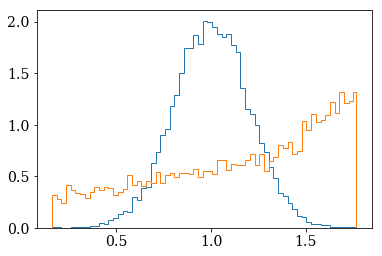

In [8]:
# Problem 2
# Generate 10000 data values from N(mu=1.0,sigma=0.2)
# Draw histogram, bin size determined from Freedman-Diaconis rule
# Overplot true distribution

#Creating distribution
N = 10000
mu = 1.0
sigma = 0.2
normDist = norm(mu,sigma)
normData = normDist.rvs(N)
trueNormData = normDist.pdf(normData)

#Calculating binsize from Freedman-Diaconis Rule
q25,q75 = np.percentile(normData,[25,75]) 
sigmaG = 0.7413*(q75-q25)
binsize = 2.7*sigmaG/(N**(1.0/3.0))
bins = np.append(np.arange(start=np.min(np.sort(normData)),stop=np.max(np.sort(normData)),step=binsize),np.max(np.sort(normData)))


#Plotting distributions
plt.hist(normData    ,bins=bins,density=True,histtype="step") #histogram with N draws & bin sized according to Freedman-Diaconis
plt.hist(trueNormData,bins=bins,density=True,histtype="step") #histogram of true distribution
print()
print("Binsize:",str(binsize))


Freedman-Diaconis Binsize: 0.0783863147702234


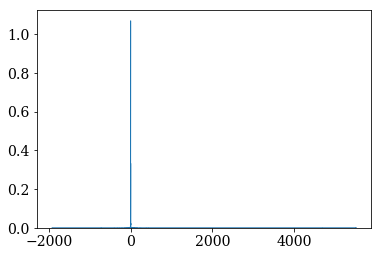

In [9]:
#Problem 3
# Repeat Problem 2, but add to the guassian sample (concatenate arrays with np.concatenate())
#10000 values drawn from cauchy distribution with mu = 2.0 and gamma = 0.5 
#Calculate two binsizes, from Freedman-Diaconis and Scott's Rule

muTwo = 2.0
gamma = 0.5
cauchyDist = cauchy(muTwo,gamma)
cauchyData = cauchyDist.rvs(N)
N = N*2
trueCauchyData = cauchyDist.pdf(cauchyData)

totalData = np.concatenate((normData,cauchyData))
trueTotalData = np.concatenate((trueNormData,trueCauchyData))

#Calculating binsize from Freedman-Diaconis Rule
q25,q75 = np.percentile(totalData,[25,75]) 
sigmaG = 0.7413*(q75-q25)
binsizeFreedman = (2.7*sigmaG)/(N**(1.0/3.0)) 
freedmanBins = np.append(np.arange(start=np.min(np.sort(totalData)),stop=np.max(np.sort(totalData)),step=binsizeFreedman),np.max(np.sort(totalData))) 

#Calculating binsize from Scott's Rule
binsizeScott = (3.5*gamma)/(N**(1.0/3.0))
scottBins = np.append(np.arange(start=np.min(np.sort(totalData)),stop=np.max(np.sort(totalData)),step=binsizeScott),np.max(np.sort(totalData)))

#Plotting distributions
plt.hist(totalData,bins=freedmanBins,density = True,histtype="step") #histogram with N draws & bin sized according to Freedman-Diaconis
# plt.hist(trueTotalData,bins=freedmanBins,density=True,histtype="step") #histogram of true distribution
print()
print("Freedman-Diaconis Binsize:",str(binsizeFreedman))


Scott's Binsize: 0.06447055122620678


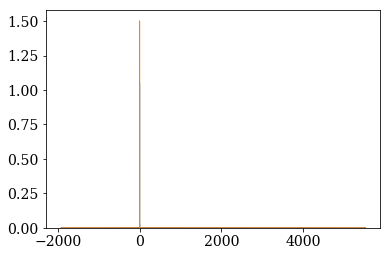

In [10]:
plt.hist(totalData,bins=scottBins,density=True,histtype="step") #histogram with N draws & bin sized according to Freedman-Diaconis
plt.hist(trueTotalData,bins=scottBins,density=True,histtype="step") #histogram of true distribution
print()
print("Scott's Binsize:",str(binsizeScott))

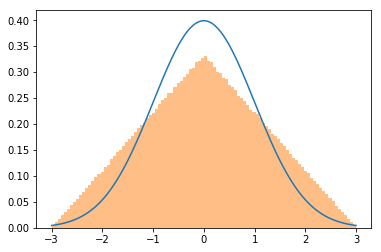

In [6]:
# Problem 4
# Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb 
# Create a distribution of 1000000 from N(0,1)
# Draws of  χ2  for N=2 and N=5
# Overplot the theoretical pdf (it will help to use scipy.special.gamma()).

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N=2 # Number of draws
mu=0
sigma=1
a = -3*sigma
b = 3*sigma

u = np.linspace(a,b,1000000) 
dist = norm(mu,sigma) 
plt.plot(u,dist.pdf(u))

yy = []
for i in np.arange(1000000):
    # Will use the formula below to shift the random draws to be centered at 0 instead of at 0.5
    # (b - a) * random_sample() + a
    xx = (b-a)*np.random.random(N)+a
    yy.append(np.mean(xx))

plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, density=True)
print()

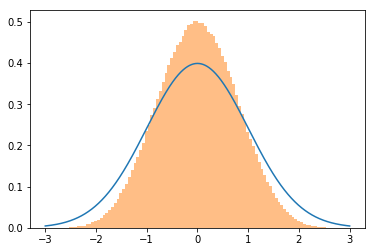

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N=5 # Number of draws
mu=0
sigma=1
a = -3*sigma
b = 3*sigma

u = np.linspace(a,b,1000000) 
dist = norm(mu,sigma) 
plt.plot(u,dist.pdf(u))

# Add a histogram that is the mean of 1,000,000 draws
yy = []
for i in np.arange(1000000):
    # Will use the formula below to shift the random draws to be centered at 0
    # (b - a) * random_sample() + a
    xx = (b-a)*np.random.random(N)+a
    yy.append(np.mean(xx))

plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, density=True)
print()